# Data Prep

In [248]:
## import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

# scipy
import scipy.stats as stats
from scipy.stats import shapiro

## Output options

In [249]:
## Exclude life expectancy from output csv?
exclude_life_exp = True

## Choose response variables to use in PCA
resp_vars = ['HDM', 'PCT_DIABETES_ADULTS13']

## Load Datasets
Uncomment to load specific datasets. Not all are needed and the ones that are needed are read in later.

In [250]:
# ## FoodEnvironmentAtlas
# variable_list = pd.read_csv('data/FoodEnvironmentAtlas/VariableList.csv')
# supp_data_state = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataState.csv')
# supp_data_county = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataCounty.csv')
# state_county_data = pd.read_csv('data/FoodEnvironmentAtlas/StateAndCountyData.csv')
# 
# ## HeartDiseaseMortality
# heart_disease_mortality = pd.read_csv('data/HeartDiseaseMortality/Heart_Disease_Mortality.csv')
# 
# ## LifeExpectancy
# life_expectancy = pd.read_csv('data/LifeExpectancy/U.S._Life_Expectancy.csv')

## Initial Feature Selection
Note: more recent data was available for some features, but I chose to use data between the years of 2010-2015
### Response/Dependent Variables
1. "PCT_DIABETES_ADULTS13" (FoodEnvironmentalAtlas): % of adults with diabetes per county 2013
2. "Life Expectancy" (U.S._Life_Expectancy): estimated life expectancy by census tract 2010-2015 (possibly uses median household for interpolation)
3. "Data_Value" (Heart_Disease_Mortality): heart disease mortality per 100,000 people per county 2014
### Independent Variables/Features
From FoodEnvironmentAtlas. All to the county level unless otherwise specified.
#### Socioeconomic
1. “PCT_65OLDER10” - % 65 and older in 2010 
2. “PCT_18YOUNGER10” - % 18 and younger in 2010 
3. “MEDHHINC15” - median household income 2015 
4. “POVRATE15” - poverty rate 2015 
5. “METRO13” - metro/non-metro counties 2010 
6. "PCT_NHWHITE10" - % population identifying as white 2010
7. "PCT_NHBLACK10" - % population identifying as black 2010
8. "PCT_HISP10" - % population identifying as Hispanic 2010
#### Store access and food assistance 
1. “PCT_LACCESS_POP15” - % population with low access to store 2015 
2. “PCT_LACCESS_LOWI15” - % low income and low access to store 2015 
3. “PCT_LACCESS_HHNV15” - % households w no car and low access to store 2015 
4. “PCT_LACCESS_SNAP15” - % SNAP households w low access to store 2015 
5. “PCT_LACCESS_CHILD15” - % children w low access to store 2015 
6. “PCT_LACCESS_SENIORS15” - % seniors w low access to store 2015 
7. “GROC11” - grocery stores 2011 
8. “SUPERC11” - supercenters and club stores 2011 
9. “CONVS11” - convenience stores 2011 
10. “SPECS11” - specialized food stores 2011 
11. “SNAPSPTH12” - SNAP authorized stores per 1000 people 2012 
12. “PC_SNAPBEN12” - SNAP benefits per capita 2012 
#### Restaurant availability 
1. “FFR11” - fast food restaurants 2011 
2. “FSR11” - full service restaurants 2011 
#### Food tax (by state) 
1. “SODATAX_STORES14” - soda sales tax retail stores 2014 
2. “SODATAX_VENDM14” - soda sales tax vending machines 2014 
3. “CHIPSTAX_STORES14” - chips and pretzels sales tax retail stores 2014 
4. “CHIPSTAX_VENDM14” - chips and pretzels sales tax vending machines 2014 
5. “FOOD_TAX14” - general food sales tax 2014 
#### Local foods 
1. “DIRSALES_FARMS12” - farms with direct sales 2012 
2. “DIRSALES12” - direct farm sales 2012 ($1000s) 
3. “PC_DIRSALES12” - direct farm sales per capita 2012 ($1s) 
4. “FMRKT13” - farmers markets 2013 
5. “FMRKT_SNAP13” - farmers markets that report accepting SNAP 2013 
6. “PCT_FMRKT_FRVEG13” - % farmers markets that report selling fruits and vegetables 2013 
7. “PCT_FMRKT_ANMLPROD13” - % farmers markets that report selling animal products 2013 
8. “VEG_FARMS12” - vegetable farms 2012 
9. “VEG_ACRES12” - vegetable acres harvested 2012 
10. “ORCHARD_FARMS12” - orchard farms 2012 
11. “ORCHARD_ACRES12” - orchard acres 2012 
12. “BERRY_FARMS12” - berry farms 2012 
13. “BERRY_ACRES12” - berry acres 2012 
14. “SLHOUSE12” - small slaughterhouse facilities 2012 
15. “GHVEG_FARMS12” - greenhouse veg and herb farms 2012 
16. “CSA12” - CSA farms 2012 
17. “AGRITRSM_OPS12” - agritourism operations 2012 
18. “AGRITRSM_RCT12” - agritourism receipts 2012 ($1s) 
#### Recreation and fitness 
1. “RECFAC11” - recreation and fitness facilities 2011 
#### Supplemental data 
1. 2010 census population 

In [251]:
## List of features to keep from state_county_data
state_county_features = ["PCT_DIABETES_ADULTS13", "PCT_65OLDER10", "PCT_18YOUNGER10", "MEDHHINC15", "POVRATE15", "METRO13", "PCT_LACCESS_POP15", "PCT_LACCESS_LOWI15", "PCT_LACCESS_HHNV15", "PCT_LACCESS_SNAP15", "PCT_LACCESS_CHILD15", "PCT_LACCESS_SENIORS15", "GROC11", "SUPERC11", "CONVS11", "SPECS11", "SNAPSPTH12", "PC_SNAPBEN12", "FFR11", "FSR11", "SODATAX_STORES14", "SODATAX_VENDM14", "CHIPSTAX_STORES14", "CHIPSTAX_VENDM14", "FOOD_TAX14", "DIRSALES_FARMS12", "DIRSALES12", "PC_DIRSALES12", "FMRKT13", "FMRKT_SNAP13", "PCT_FMRKT_FRVEG13", "PCT_FMRKT_ANMLPROD13", "VEG_FARMS12", "VEG_ACRES12", "ORCHARD_FARMS12", "ORCHARD_ACRES12", "BERRY_FARMS12", "BERRY_ACRES12", "SLHOUSE12", "GHVEG_FARMS12", "CSA12", "AGRITRSM_OPS12", "AGRITRSM_RCT12", "RECFAC11", "PCT_NHWHITE10", "PCT_NHBLACK10", "PCT_HISP10"]

## Select features from state_county_data and tidy dataframe
state_county_data = pd.read_csv('data/FoodEnvironmentAtlas/StateAndCountyData.csv')
state_county_data['CountySt'] = state_county_data['County'].str.cat(state_county_data['State'], sep=', ')
df = state_county_data[state_county_data["Variable_Code"].isin(state_county_features)].pivot_table(index="CountySt", columns="Variable_Code", values="Value", aggfunc='max')
del state_county_data

## Merge supplementary data (2010 Census Population)
supp_data_county = pd.read_csv('data/FoodEnvironmentAtlas/SupplementalDataCounty.csv')
supp_data_county['County'] = [c if 'County' not in c else c[:-7] for c in supp_data_county['County']]
supp_data_county['CountySt'] = supp_data_county['County'].str.cat(supp_data_county['State'], sep=',')
supp_data_county = supp_data_county.pivot(index="CountySt", columns="Variable_Code", values="Value")
df = df.join(supp_data_county, how="left")
df.drop(supp_data_county.columns[1:], axis=1, inplace=True)
del supp_data_county

## Merge heart disease mortality
hdm = pd.read_csv('data/HeartDiseaseMortality/Heart_Disease_Mortality.csv')
hdm = hdm.loc[(hdm["Stratification1"]=="Overall") & (hdm["Stratification2"]=="Overall"), ["LocationAbbr", "LocationDesc", "Data_Value"]]
hdm.rename(columns={'LocationAbbr': 'State', 'LocationDesc': 'County', 'Data_Value': 'HDM'}, inplace=True)
hdm['County'] = [c if 'County' not in c else c[:-7] for c in hdm['County']]
hdm['CountySt'] = hdm['County'].str.cat(hdm['State'], sep=', ')
hdm.drop(['State', 'County'], axis=1, inplace=True)
hdm.set_index('CountySt', inplace=True)
df = df.join(hdm, how='left')
del hdm

## Merge life expectancy
life_expectancy = pd.read_csv('data/LifeExpectancy/U.S._Life_Expectancy.csv')
life_expectancy.dropna(axis=0, how='any', inplace=True)
life_expectancy['County'] = life_expectancy['County'].str.replace(' County', '')
life_expectancy.rename(columns={'County': 'CountySt'}, inplace=True)
life_expectancy = life_expectancy[['CountySt','Life Expectancy']].groupby(['CountySt']).mean()
df = df.join(life_expectancy, how='left')
del life_expectancy

## Remove duplicated indices
df = df.groupby(level=0).max()

## Compare Response Variables
### Pairplot
All 3 variables appear somewhat normally distributed, or could approximate normal with log transformation.
### Heatmap
Diabetes rate and heart disease mortality are positively correlated as expected. Both variables are negatively correlated with life expectancy as expected.

In [252]:
# sns.pairplot(df, vars=['HDM', 'Life Expectancy', 'PCT_DIABETES_ADULTS13'], corner=True, diag_kind='kde', kind='kde')
# plt.suptitle('Response variable pairplot kde')
# plt.savefig('data/figures/Response variable pairplot.png')
# plt.show()

In [253]:
# sns.heatmap(df[['HDM', 'Life Expectancy', 'PCT_DIABETES_ADULTS13']].corr(), annot=True)
# plt.title('Response variable correlations')
# plt.savefig('data/figures/Response variable corr heatmap.png')
# plt.show()

## Response Variable PCA
Perform dimensionality reduction on the possible response variables to obtain a single response variable capturing the trends in all.
### Pairplot
The contour plots between PC1 and the response variables are noticeably less variable than the contour plots between the response variables themselves (above).
### Heatmap
Likewise, the correlation coefficients are greater as well.
### Note
PC1 is positively correlated with heart disease mortality and diabetes rate, meaning that <b>greater</b> values of PC1 indicate <b>worse</b> health. Therefore, multiply PC1 by -1 so that <b>greater</b> values of PC1 indicate <b>better</b> health.

In [254]:
# Print selected response variables
print(f'Selected Response Variables: {resp_vars}')

# Select response variables and standardize
pca_df = df[resp_vars].copy()
pca_df.dropna(axis=0, how='any', inplace=True)
pca_df[resp_vars] = StandardScaler().fit_transform(pca_df)

# PCA fit, transform, calculate explained variance
explained_var = PCA(random_state=10).fit(pca_df).explained_variance_ratio_
pca_df['PCA'] = PCA(random_state=10, n_components=1).fit_transform(pca_df)
print(f'Explained variance ratios: {explained_var}')

# count nans in response variables
df[resp_vars].isna().sum()
print(f'% data retained after removing response variable nans: {pca_df.shape[0] / df.shape[0]*100:.2f}%\n')

# merge PCA response variable
df = df.join(pca_df['PCA'], how='left')

# # compare first principle component with raw response variables
# sns.pairplot(pca_df, x_vars=resp_vars, y_vars=['PCA'], kind='kde')
# plt.title('Response variable PCA pairplot kde')
# plt.savefig('data/figures/Response variable PCA pairplot.png')
# plt.show()
# 
# # display correlations between response variables
# sns.heatmap(pca_df.corr(), annot=True)
# plt.title('Response variable PCA correlations')
# plt.savefig('data/figures/Response variable PCA corr heatmap.png')
# plt.show()

# reverse PC1 sign
df['PCA'] *= -1

# export raw data
df.to_csv('./data/raw_data.csv', index_label='CountySt')

Selected Response Variables: ['HDM', 'PCT_DIABETES_ADULTS13']
Explained variance ratios: [0.79920531 0.20079469]
% data retained after removing response variable nans: 96.59%



## Collinearity
Check for collinear variables.
### Drop redundant collinear variables
1. 'CHIPSTAX_STORES14'
2. 'PCT_LACCESS_CHILD15'
3. 'PCT_LACCESS_SENIORS15'
4. 'PCT_LACCESS_LOWI15'
5. 'PC_SNAPBEN12'
### Other collinear variables
Store (grocery, convenience, specialty, supercenter, and farmers market), restaurant (fast food and full service), and recreational facility counts are highly correlated with census population.
#### Strategy
1. "healthy_store_ratio" = ratio between stores with "healthy" options (grocery + specialty + supercenter) : stores without healthy options (convenience).
2. "healthy_restaurant_ratio" = ratio between full service : fast food restaurants.
3. "recfac_pc" = recreational facilities per capita (RECFAC11 / 2010_Census_Population)
4. "fmrkt_pc" = farmers markets per capita (FMRKT13 / 2010_Census_Population)

In [255]:
# check for collinearity
corr = df.corr().abs().unstack()
corr = corr.sort_values(ascending=False)
print('__________\nCollinear features\n__________')
print('\n'.join([f'{c1}, {c2}: {corr[c1,c2]:.4f}' for c1, c2 in corr.index if c1 != c2 and corr[c1,c2] > 0.7]))

# make sure CONVS11 and FFR11 don't have zeros
print('__________')
print(f'# zeros in CONVS11: {(df['CONVS11'] == 0).sum(axis=0)}')
print(f'# zeros in FFR11: {(df['FFR11'] == 0).sum(axis=0)}')

# calculate ratios (add 1s to avoid divide by zero)
df['healthy_store_ratio'] = (df['GROC11'] + df['SPECS11'] + df['SUPERC11'] + 1) / (df['CONVS11'] + 1)
df['healthy_restaurant_ratio'] = (df['FSR11'] + 1) / (df['FFR11'] + 1)
df['recfac_pc'] = df['RECFAC11'] / df['2010_Census_Population']
df['fmrkt_pc'] = df['FMRKT13'] / df['2010_Census_Population']

# drop collinear variables
df.drop(['CHIPSTAX_VENDM14', 'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_LOWI15', 'PC_SNAPBEN12', 'GROC11', 'SPECS11', 'SUPERC11', 'CONVS11', 'FSR11', 'FFR11', 'RECFAC11', 'FMRKT13'], axis=1, inplace=True)

# recheck collinearity
corr = df.corr().abs().unstack()
corr = corr.sort_values(ascending=False)
print('__________\nCollinear features (after ratios and removal)\n__________')
print('\n'.join([f'{c1}, {c2}: {corr[c1,c2]:.4f}' for c1, c2 in corr.index if c1 != c2 and corr[c1,c2] > 0.7]))

__________
Collinear features
__________
FOOD_TAX14, CHIPSTAX_STORES14: 1.0000
CHIPSTAX_STORES14, FOOD_TAX14: 1.0000
FFR11, 2010_Census_Population: 0.9888
2010_Census_Population, FFR11: 0.9888
FSR11, FFR11: 0.9746
FFR11, FSR11: 0.9746
SPECS11, GROC11: 0.9680
GROC11, SPECS11: 0.9680
FSR11, RECFAC11: 0.9590
RECFAC11, FSR11: 0.9590
PCT_LACCESS_POP15, PCT_LACCESS_CHILD15: 0.9562
PCT_LACCESS_CHILD15, PCT_LACCESS_POP15: 0.9562
FSR11, 2010_Census_Population: 0.9522
2010_Census_Population, FSR11: 0.9522
FFR11, RECFAC11: 0.9448
RECFAC11, FFR11: 0.9448
SPECS11, FSR11: 0.9263
FSR11, SPECS11: 0.9263
RECFAC11, 2010_Census_Population: 0.9260
2010_Census_Population, RECFAC11: 0.9260
CONVS11, 2010_Census_Population: 0.9228
2010_Census_Population, CONVS11: 0.9228
SPECS11, FFR11: 0.9177
FFR11, SPECS11: 0.9177
PCT_LACCESS_SENIORS15, PCT_LACCESS_POP15: 0.9086
PCT_LACCESS_POP15, PCT_LACCESS_SENIORS15: 0.9086
FFR11, CONVS11: 0.9049
CONVS11, FFR11: 0.9049
PCT_LACCESS_LOWI15, PCT_LACCESS_POP15: 0.9027
PCT_LAC

## Nan Analysis
Remove features with >5% nans (besides census population):
1. 'AGRITRSM_RCT12'
2. 'BERRY_ACRES12'
3. 'DIRSALES12'
4. 'ORCHARD_ACRES12'
5. 'PC_DIRSALES12'
6. 'VEG_ACRES12'

Remove all remaining counties (rows) with nans. 2920 counties remain (93.11%)


In [256]:
# count nans in all variables
nan_count = df.isna().sum()
print('__________\nFeatures with >5% nans\n__________\n')
print(nan_count[nan_count > 0.05*df.shape[0]].sort_values(ascending=False))

# drop variables with >5% nans (except census population)
df.drop(['AGRITRSM_RCT12', 'BERRY_ACRES12', 'DIRSALES12', 'ORCHARD_ACRES12', 'PC_DIRSALES12', 'VEG_ACRES12'], axis=1, inplace=True)

# remove life expectancy before dropping nans?
if exclude_life_exp:
    df.drop('Life Expectancy', axis=1, inplace=True)
    
# % counties without nans
print(f'counties without nans = {df.dropna(axis=0).shape[0]}, {df.dropna(axis=0).shape[0]/df.shape[0]*100:.2f}%')

__________
Features with >5% nans
__________

AGRITRSM_RCT12            1017
BERRY_ACRES12              802
ORCHARD_ACRES12            589
VEG_ACRES12                555
PC_DIRSALES12              236
DIRSALES12                 235
2010_Census_Population     195
recfac_pc                  195
fmrkt_pc                   195
Life Expectancy            160
dtype: int64
counties without nans = 2920, 93.11%


### Nan Bias
Check for bias in counties with nans (removed).

Counties with nans (removed) have significantly greater diabetes rates than counties with complete data.

In [257]:
## Check if counties with nans have worse health
nan_count_per_row = df.isna().sum(axis=1)
nan_df = pd.DataFrame(nan_count_per_row).join(df['PCT_DIABETES_ADULTS13'], how='left')
nan_df.rename(columns={0: 'nans'}, inplace=True)
nan_df['has_nans'] = nan_df['nans'] > 0

# # boxplot
# sns.boxplot(x=nan_df['PCT_DIABETES_ADULTS13'], hue=nan_df['has_nans'])
# plt.title('Counties with incomplete data have higher diabetes rates')
# plt.savefig('data/figures/diabetes rates vs nans boxplot.png')
# plt.show()

# t test
ttest = stats.ttest_ind(nan_df.loc[nan_df['has_nans']==True, 'PCT_DIABETES_ADULTS13'], nan_df.loc[nan_df['has_nans']==False, 'PCT_DIABETES_ADULTS13'])
print(f'counties with nans have diabetes rates between {ttest.confidence_interval()[0]:.4f} and {ttest.confidence_interval()[1]:.4f} greater than counties without nans, p-value = {ttest[1]:.4e}')

# remove rows with nans
df.dropna(axis=0, inplace=True)

counties with nans have diabetes rates between 0.9555 and 1.6370 greater than counties without nans, p-value = 1.1279e-13


## Normality

In [258]:
# ## Check normality of all variables
# fig, axs = plt.subplots(6, 6, figsize=(15, 15))
# axs = axs.flatten()
# for i,col in enumerate(df.columns):
#     sns.kdeplot(df[col], ax=axs[i])
# plt.tight_layout()
# plt.suptitle('Check distributions of all features')
# plt.savefig('data/figures/feature normality check kde.png')
# plt.show()

### Test for normality
Shapiro-Wilk normality test
#### Count zeros
Features with many zeros may need to be converted to dummy vars, or use fewer bins for quantile transformation.

In [259]:
# test for normality
res = shapiro(df, axis=0)
normality_test = pd.DataFrame({'Features': df.columns, 'Statistic': res.statistic, 'pvalue': res.pvalue})
normality_test

,Features,Statistic,pvalue
0,AGRITRSM_OPS12,0.587956,5.419877e-64
1,BERRY_FARMS12,0.449569,1.354227e-69
2,CHIPSTAX_STORES14,0.581093,2.635669e-64
3,CSA12,0.561572,3.576999e-65
4,DIRSALES_FARMS12,0.627380,4.200365e-62
5,FOOD_TAX14,0.581093,2.635669e-64
6,GHVEG_FARMS12,0.473349,1.003924e-68
7,MEDHHINC15,0.921512,1.485364e-36
8,METRO13,0.608887,5.211573e-63
9,ORCHARD_FARMS12,0.144618,1.378420e-78


In [260]:
# count zeros for each feature
print(f'count 0s per feature:\n{(df == 0).sum(axis=0).sort_values(ascending=False)}')

count 0s per feature:
CHIPSTAX_STORES14           2040
FOOD_TAX14                  2040
METRO13                     1859
SLHOUSE12                   1856
GHVEG_FARMS12               1317
fmrkt_pc                     897
CSA12                        889
recfac_pc                    882
BERRY_FARMS12                704
SODATAX_STORES14             599
ORCHARD_FARMS12              344
VEG_FARMS12                  273
SODATAX_VENDM14              247
AGRITRSM_OPS12               243
DIRSALES_FARMS12              72
PCT_NHBLACK10                 31
SNAPSPTH12                    20
PCT_LACCESS_SNAP15            13
PCT_LACCESS_HHNV15             9
PCT_LACCESS_POP15              8
PCT_HISP10                     1
POVRATE15                      0
PCT_DIABETES_ADULTS13          0
PCT_NHWHITE10                  0
PCT_65OLDER10                  0
MEDHHINC15                     0
2010_Census_Population         0
HDM                            0
PCA                            0
healthy_store_ratio  

### Transform non-normal variables
#### Consolidate farm vars
sum_farms = sum(ORCHARD_FARMS12, BERRY_FARMS12, GHVEG_FARMS12, VEG_FARMS12, CSA12, AGRITRSM_OPS12)
#### Dummy vars for bimodal distributions
##### Tax vars
The tax features have bimodal variables, so create the following dummy vars and remove the originals.
1. 'has_food_tax' = if FOOD_TAX_14 != 0
2. 'has_soda_tax' = if SODA_TAX_STORES14 != 0
3. 'has_chips_tax' = if CHIPS_TAX_STORES14 != 0

Remove FOOD_TAX_14, SODA_TAX_STORES14, CHIPS_TAX_STORES14, and SODA_TAX_VENDM14
##### Other bimodal vars
1. 'has_recfac' = if recfac_pc != 0
2. 'has_slaughter' = if SLHOUSE12 != 0
3. 'has_fmrkt' = if fmrkt_pc != 0
#### Quantile transformation
Perform quantile transformation on all remaining variables besides dummy vars.

In [261]:
# Consolidate farm vars
farm_vars = ['ORCHARD_FARMS12', 'BERRY_FARMS12', 'GHVEG_FARMS12', 'VEG_FARMS12', 'CSA12', 'AGRITRSM_OPS12']
df['sum_farms'] = df[farm_vars].sum(axis=1)
df.drop(farm_vars, axis=1, inplace=True)

# # plot sum_farms
# sns.histplot(df['sum_farms'])
# plt.show()

# bimodal dummy vars
df['has_food_tax'] = df['FOOD_TAX14'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['has_soda_tax'] = df['SODATAX_STORES14'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['has_chip_tax'] = df['CHIPSTAX_STORES14'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['has_recfac'] = df['recfac_pc'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['has_slaughter'] = df['SLHOUSE12'].apply(lambda x: 1.0 if x > 0 else 0.0)
df['has_fmrkt'] = df['fmrkt_pc'].apply(lambda x: 1.0 if x > 0 else 0.0)

df.drop(['FOOD_TAX14', 'SODATAX_STORES14', 'SODATAX_VENDM14', 'CHIPSTAX_STORES14', 'recfac_pc', 'SLHOUSE12', 'fmrkt_pc'], axis=1, inplace=True)

# export data before quantile transformations
df.to_csv('./data/data_not_normalized.csv', index_label='CountySt')

In [262]:
# Quantile transformations
dummy_vars = ['METRO13', 'has_food_tax', 'has_soda_tax', 'has_chip_tax', 'has_recfac', 'has_slaughter']
quant_trans_vars = list(set(df.columns) - set(dummy_vars))
df[quant_trans_vars] = QuantileTransformer(random_state=10, output_distribution='uniform').fit_transform(df.loc[:, quant_trans_vars])

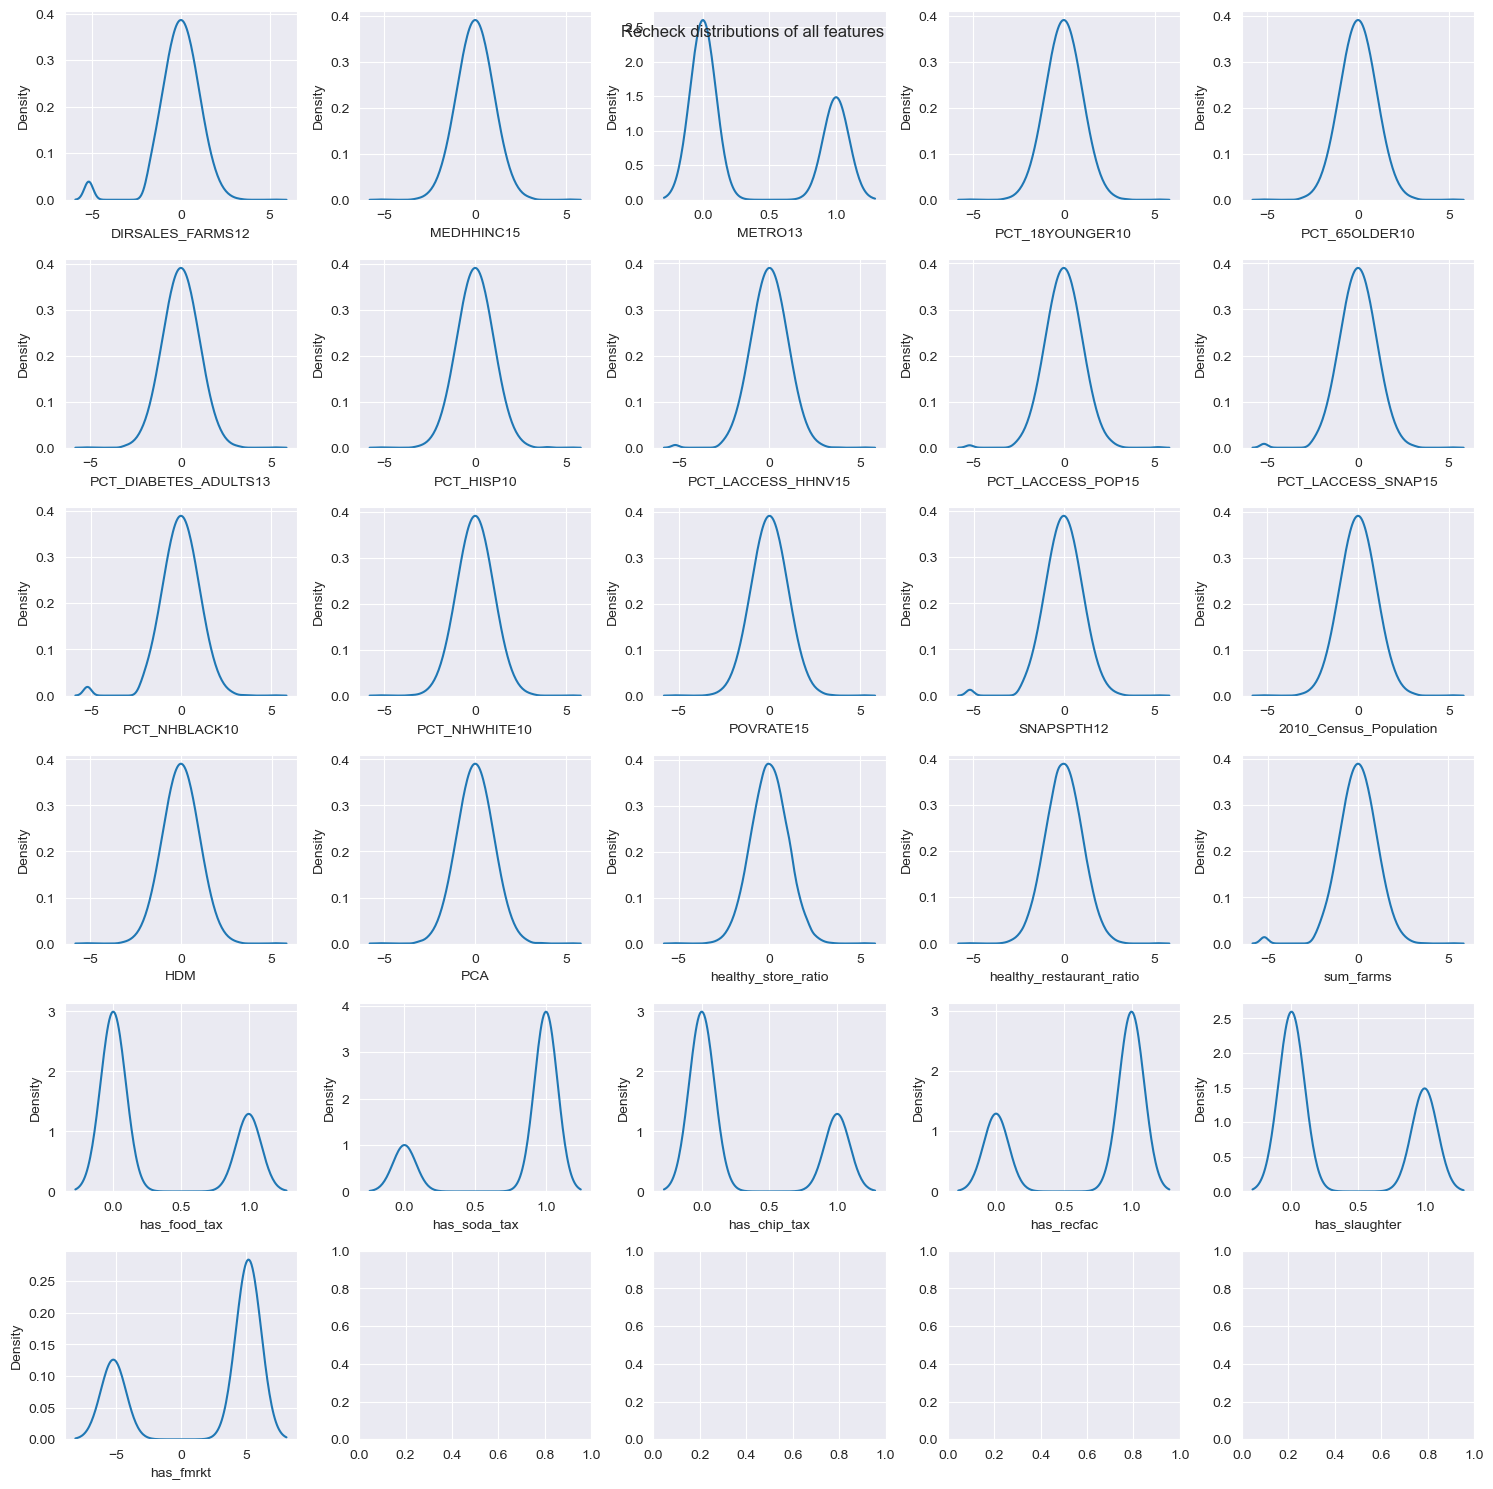

,Features,Statistic,pvalue
0,DIRSALES_FARMS12,0.886738,6.073486e-42
1,MEDHHINC15,0.998564,1.196249e-02
2,METRO13,0.608887,5.211573e-63
3,PCT_18YOUNGER10,0.998564,1.200026e-02
4,PCT_65OLDER10,0.998552,1.133131e-02
5,PCT_DIABETES_ADULTS13,0.998379,5.071636e-03
6,PCT_HISP10,0.998213,2.385273e-03
7,PCT_LACCESS_HHNV15,0.986116,2.589858e-16
8,PCT_LACCESS_POP15,0.986869,8.372228e-16
9,PCT_LACCESS_SNAP15,0.978944,2.139700e-20


In [263]:
# # Replot transformed distributions
# fig, axs = plt.subplots(6, 5, figsize=(15, 15))
# axs = axs.flatten()
# for i,col in enumerate(df.columns):
#     sns.kdeplot(df[col], ax=axs[i])
# plt.tight_layout()
# plt.suptitle('Recheck distributions of all features')
# plt.savefig('data/figures/recheck normality kde.png')
# plt.show()
# 
# # Shapiro-Wilk retest
# res = shapiro(df, axis=0)
# normality_test = pd.DataFrame({'Features': df.columns, 'Statistic': res.statistic, 'pvalue': res.pvalue})
# normality_test

## Nonlinearity
Check if any variables appear to have a nonlinear relationship with the response variable.

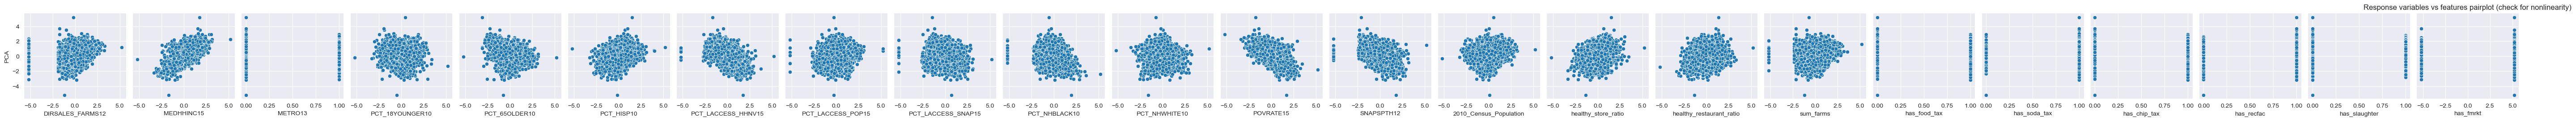

In [264]:
## Nonlinearity
yvars = ['PCT_DIABETES_ADULTS13', 'HDM', 'PCA']
if not exclude_life_exp:
    yvars += ['Life Expectancy']
xvars = [v for v in df.columns if v not in yvars]
sns.pairplot(df, x_vars=xvars, y_vars=['PCA'])
plt.title('Response variables vs features pairplot (check for nonlinearity)')
plt.savefig('data/figures/nonlinearity check pairplot.png')
plt.show()